<a href="https://colab.research.google.com/github/Yaman2000/Complete-ML-Notebooks/blob/main/NLP_Emotion_Detection_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
The objective is to build a model that  detects the emotion hidden in the text comments. The emotons include happiness,sadness,worry, love etc.,

In [1]:
# pip install nltk
# pip install spacy


In [2]:
import pandas as pd
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Q1)Import the data

In [68]:
emotion_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Final_Emotion_Data/Final_Emotion_Data.csv")

In [4]:
emotion_data.head()

,Id,Emotion,Text
0,1,anger,im grabbing a minute to post i feel greedy wrong
1,1,sadness,i didnt feel humiliated
2,2,sadness,i can go from feeling so hopeless to so damned...
3,4,love,i am ever feeling nostalgic about the fireplac...
4,5,anger,i am feeling grouchy


In [5]:
# Lower case

emotion_data["text_lowcase"]=emotion_data["Text"].apply(lambda x:str(x).lower())
emotion_data.sample(10)

,Id,Emotion,Text,text_lowcase
7952,7953,happiness,i am in size now and im afrad its making me fe...,i am in size now and im afrad its making me fe...
26883,26884,neutral,at work,at work
41743,41744,happiness,Happy Star Wars day everyone! and Enjoy the ho...,happy star wars day everyone! and enjoy the ho...
55032,55033,happiness,"Good morning, to all the mommies happy mothers...","good morning, to all the mommies happy mothers..."
21564,21565,sadness,"@joinrick cool, not a big user of DM though","@joinrick cool, not a big user of dm though"
40315,40316,fun,finishing up at the studio NEW SONGS UP ON MY...,finishing up at the studio new songs up on my...
29064,29065,worry,What happened with her??? Why is she being so ...,what happened with her??? why is she being so ...
54717,54718,happiness,@sassij That's good to hear - morning,@sassij that's good to hear - morning
45725,45726,love,Amazing day with my boyfriend. He's a good dru...,amazing day with my boyfriend. he's a good dru...
20246,20247,worry,@seansmithsucks i would be looking forward to ...,@seansmithsucks i would be looking forward to ...


In [6]:
#Tokenzation

from nltk.tokenize import word_tokenize
emotion_data["word_tokens"] = emotion_data["text_lowcase"].apply(lambda x:word_tokenize(str(x)))
#lambda function to apply on all rows
#str() function to avoid numeric and other errors
emotion_data[["Text","word_tokens"]].sample(10)

,Text,word_tokens
30986,@whatswhat_sian lol. I don't have the benefit ...,"[@, whatswhat_sian, lol, ., i, do, n't, have, ..."
6735,i think my hair is feeling confused,"[i, think, my, hair, is, feeling, confused]"
55914,watching Bolt with my brothers and my mom.,"[watching, bolt, with, my, brothers, and, my, ..."
17861,am hungry agaaaaaaiiiin maaaam,"[am, hungry, agaaaaaaiiiin, maaaam]"
55407,@Fooddesigner good luck in the pressure test! ...,"[@, fooddesigner, good, luck, in, the, pressur..."
8245,i have written i don t know why this would mak...,"[i, have, written, i, don, t, know, why, this,..."
14957,im pretty sure everyone left feeling festive,"[im, pretty, sure, everyone, left, feeling, fe..."
55622,cleaning day!,"[cleaning, day, !]"
8251,i drink into my feelings get numb,"[i, drink, into, my, feelings, get, numb]"
48405,May 10 is Human Kindness Day.,"[may, 10, is, human, kindness, day, .]"


In [25]:
# Expanding Transformation

contra_Expan_Dict = {"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
"could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
"haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have",
"he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will",
"how's": "how does","i'd": "i would","i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am",
"i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have",
"o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not",
"sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have",
"she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is",
"that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is",
"they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have",
"to've": "to have","wasn't": "was not"," u ": " you "," ur ": " your "," n ": " and ","won't": "would not",
"dis": "this","bak": "back","brng": "bring","aint": "is not",
    "arent": "are not",
    "cant": "cannot",
    "couldve": "could have",
    "couldnt": "could not",
    "couldntve": "could not have",
    "didnt": "did not",
    "doesnt": "does not",
    "dont": "do not",
    "hadnt": "had not",
    "hadntve": "had not have",
    "hasnt": "has not",
    "havent": "have not",
    "hed": "he would",
    "hedve": "he would have",
    "hell": "he will",
    "hes": "he is",
    "howd": "how did",
    "howll": "how will",
    "hows": "how is",
    "id": "I would",
    "idve": "I would have",
    "ill": "I will",
    "im": "I am",
    "ive": "I have",
    "isnt": "is not",
    "itd": "it would",
    "itdve": "it would have",
    "itll": "it will",
    "its": "it is",
    "lets": "let us",
    "maam": "madam",
    "mightve": "might have",
    "mightnt": "might not",
    "mightntve": "might not have",
    "mustve": "must have",
    "mustnt": "must not",
    "neednt": "need not",
    "notve": "not have",
    "oclock": "of the clock",
    "oughtnt": "ought not",
    "shant": "shall not",
    "shed": "she would",
    "shedve": "she would have",
    "shell": "she will",
    "shes": "she is",
    "shouldve": "should have",
    "shouldnt": "should not",
    "shouldntve": "should not have",
    "somethings": "something is",
    "thatd": "that would",
    "thatdve": "that would have",
    "thats": "that is",
    "thered": "there would",
    "theredve": "there would have",
    "theres": "there is",
    "theyd": "they would",
    "theydve": "they would have",
    "theyll": "they will",
    "theyre": "they are",
    "theyve": "they have",
    "wasnt": "was not",
    "wed": "we would",
    "wedve": "we would have",
    "weve": "we have",
    "werent": "were not",
    "whatll": "what will",
    "whatre": "what are",
    "whats": "what is",
    "whatve": "what have",
    "whens": "when is",
    "whered": "where did",
    "wheres": "where is",
    "wholl": "who will",
    "whos": "who is",
    "whove": "who have",
    "wont": "will not",
    "wouldve": "would have",
    "wouldnt": "would not",
    "wouldntve": "would not have",
    "yall": "you all",
    "youd": "you would",
    "youdve": "you would have",
    "youll": "you will",
    "youre": "you are",
    "youve": "you have"
     }

In [26]:
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

In [27]:
x=str(emotion_data["text_lowcase"][1664])
print("original text ==>", x)
x=x.split()
print("Expanded form ==>",[expanded_form(t) for t in x])

original text ==> i havent been feeling fantastic this week so i thought id do something different and easier to write that i thought could be fun
Expanded form ==> ['i', 'have not', 'been', 'feeling', 'fantastic', 'this', 'week', 'so', 'i', 'thought', 'I would', 'do', 'something', 'different', 'and', 'easier', 'to', 'write', 'that', 'i', 'thought', 'could', 'be', 'fun']


In [28]:
emotion_data["text_expanded"]=emotion_data["text_lowcase"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
emotion_data[["Text","text_expanded"]].sample(10)

,Text,text_expanded
5662,ive been coughing for the past few days now an...,"[I have, been, coughing, for, the, past, few, ..."
20673,damn! got caught eating my Cadbury Temptations...,"[damn!, got, caught, eating, my, cadbury, temp..."
18173,@Keiyaunna So i guess im stuck in the LOBBY,"[@keiyaunna, so, i, guess, I am, stuck, in, th..."
25691,Why are all the cool classes being offered thi...,"[why, are, all, the, cool, classes, being, off..."
35035,@bellagm yes that sucks. i miss you,"[@bellagm, yes, that, sucks., i, miss, you]"
2386,i wish to feel your tender bites,"[i, wish, to, feel, your, tender, bites]"
27333,@wholee Aaron and I are playing a gig at the L...,"[@wholee, aaron, and, i, are, playing, a, gig,..."
40246,@MerCuriosJewels Wonderful trip! Read all 4 T...,"[@mercuriosjewels, wonderful, trip!, read, all..."
49178,was busy talking with mom and bhabhi.. they li...,"[was, busy, talking, with, mom, and, bhabhi..,..."
54876,Just got home from another amazing night,"[just, got, home, from, another, amazing, night]"


In [29]:
emotion_data[["Text","text_expanded"]].sample(10)

,Text,text_expanded
53949,I hear you @silentending...,"[i, hear, you, @silentending...]"
26211,is really sad about her nephew but keeping bu...,"[is, really, sad, about, her, nephew, but, kee..."
39417,Probando TweetDeck,"[probando, tweetdeck]"
51080,i hate having the same hair for too long. i th...,"[i, hate, having, the, same, hair, for, too, l..."
27855,I'm gonna cry I went bad at my History test...,"[i am, gonna, cry, i, went, bad, at, my, histo..."
6647,i really feel devastated seeing him witness th...,"[i, really, feel, devastated, seeing, him, wit..."
16988,Forgot my power cable at home today,"[forgot, my, power, cable, at, home, today]"
23763,My parents withdrew permission at the last mom...,"[my, parents, withdrew, permission, at, the, l..."
48991,@Mingo123 SUFFICATION NO BREATHING. It's okay....,"[@mingo123, suffication, no, breathing., it is..."
28576,I don't know what my Mom gave me to clean my M...,"[i, do not, know, what, my, mom, gave, me, to,..."


In [30]:
# Stopwords removal
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english')) ##Selecting the stop words from the Language
print("Number of Stop words in NLTK ==>", len(nltk_stop_words))
print(sorted(nltk_stop_words))

Number of Stop words in NLTK ==> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

In [31]:
# spacy words
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print("Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))
#Spacy stopwords list looks better.

Number of Stop words in spaCy ==> 331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'ha', 'had', 'has

In [33]:
x= ['i', 'saw', 'it', 'the', 'movie', 'is', 'pathetic']
print("original Text ==>", x)
print("After Removing Stopwords ==>",[t for t in x if t not in spacy_stopwords])

original Text ==> ['i', 'saw', 'it', 'the', 'movie', 'is', 'pathetic']
After Removing Stopwords ==> ['saw', 'movie', 'pathetic']


In [35]:
emotion_data["After_Removing_Stopwords"] = emotion_data["text_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
emotion_data[["Text","After_Removing_Stopwords"]].sample(10)

,Text,After_Removing_Stopwords
43461,"@CoachCharrise its funny, I didn't even know i...","[@coachcharrise, it is, funny,, did not, know,..."
14379,i hate feeling like this im always getting mad...,"[hate, feeling, I am, getting, mad, reason, fe..."
34698,Hey @jerrymontano! @secrettweet is mainly dep...,"[hey, @jerrymontano!, @secrettweet, mainly, de..."
42031,its castiel!!!! [ the angle ],"[it is, castiel!!!!, [, angle, ]]"
52809,"@rebelraising Yeah, that lying in bed thing's ...","[@rebelraising, yeah,, lying, bed, thing's, bu..."
24176,Why doesn't McDonald's make PINEAPPLE pies?,"[does not, mcdonald's, pineapple, pies?]"
26625,@sarahfenn I prefer overcast days too. Sorry i...,"[@sarahfenn, prefer, overcast, days, too., sor..."
35980,"pavement is boiling hot out there, dogs were l...","[pavement, boiling, hot, there,, dogs, limping..."
29472,@tinyraisins Im in so deep its disgusting. I w...,"[@tinyraisins, I am, deep, it is, disgusting.,..."
14598,i kind of feel like im losing a part of myself...,"[kind, feel, I am, losing, lame]"


# Q2)Get the unique list of emotions and their frequency counts.

In [36]:
# Add Custom Stowords
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
print("New Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))

New Number of Stop words in spaCy ==> 331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'ha', 'had', 

In [37]:
emotion_data["After_Removing_Stopwords"] = emotion_data["text_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
emotion_data[["Text","After_Removing_Stopwords"]].sample(10)

,Text,After_Removing_Stopwords
37618,"@sunrisesister yeah, so quick! And I'm using t...","[@sunrisesister, yeah,, quick!, i am, 5mm, add..."
22663,@dlanham hey is there a way u can make a somat...,"[@dlanham, hey, way, u, somatic, theme, leopar..."
16676,I didn't get a callback for the play I cried.....,"[did not, callback, play, cried..., oh, guess,..."
35533,"@KRITM awe I am sorry, probably true.","[@kritm, awe, sorry,, probably, true.]"
19880,is school over yet? Im ready for vacations alr...,"[school, yet?, I am, ready, vacations]"
15135,i remember smiling when i saw her picture and ...,"[remember, smiling, saw, picture, feeling, hap..."
55493,Cleaning all day today after he runs off to do...,"[cleaning, day, today, runs, stuff, setting, s..."
33236,i soooo want to get a Nikon D 90 damn y do th...,"[soooo, want, nikon, d, 90, damn, y, cost, soo..."
48469,@Turrislove09 but i realllllllly want to. llik...,"[@turrislove09, realllllllly, want, to., llike..."
38291,Hope you all have a great Bank Holiday Monday!,"[hope, great, bank, holiday, monday!]"


In [38]:
# Regular Expression
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

In [42]:
import re
emotion_data["text_cleaned_Regex"]=emotion_data["After_Removing_Stopwords"].apply(lambda x:clean_with_re(x))
emotion_data[["Text","text_cleaned_Regex"]].sample(10)

,Text,text_cleaned_Regex
29463,@MATTHARDYBRAND What is everyone saying about ...,matthardybrand saying supposed nude pics matt ...
6780,i dont know how else to word it i miss feeling...,do not know word miss feeling respected guy ab...
43588,@Cpopulus happy birthday corey!!,cpopulus happy birthday corey
40824,"@selenagomez Hi S, plz follow me",selenagomez hi s plz follow
21676,Dangling belly rings are a bad investment...th...,dangling belly rings bad investmentthe cutest ...
52313,"@Caps_Girl Girl, those are bangin' shoes!!! W...",caps girl girl bangin shoes work it
26603,Waiting for 5:00 &amp; having cramps,waiting amp having cramps
6259,i know hes upset that ryan did this to me he l...,know he is upset ryan liked met thought feelin...
11922,ive had a few moments the past couple of days ...,I have moments past couple days feel restless ...
49642,I'd like to thank my normally only randomly wo...,i would thank normally randomly working intern...


In [45]:
emotion_data[["After_Removing_Stopwords","text_cleaned_Regex"]].sample(10)

,After_Removing_Stopwords,text_cleaned_Regex
13276,"[I would, actually, feeling, hostile, ms, lot,...",I would actually feeling hostile ms lot linux ...
39013,"[@dollburrell, ooh,, cutting.]",dollburrell ooh cutting
12130,"[wanted, apologize, feel, heartless, bitch]",wanted apologize feel heartless bitch
52692,"[@demiswissfan, yer, hope, competition, does n...",demiswissfan yer hope competition does not end...
41407,"[@dreaming_awake, good, midday.]",dreaming awake good midday
8569,"[feeling, weepy, emotional]",feeling weepy emotional
16421,"[@charloro, jealous, looks, schindler's, list,...",charloro jealous looks schindlers list toronto
14158,"[feel, regretful, let, mundane, things, work, ...",feel regretful let mundane things work school way
29850,"[@xxhazelxx, do not, think, happy, were...]",xxhazelxx do not think happy were
41477,"[good, morning.]",good morning


In [ ]:
# Spelling Correction

In [47]:
!pip install textblob
!python textblob.download_corpora

python3: can't open file '/content/textblob.download_corpora': [Errno 2] No such file or directory


In [48]:
# we do not use that textblob, cuz it change the meaning of word

from textblob import TextBlob
sample_text="What an grat and amazimg week. I am excited to learn data scienec"
corrected_text=TextBlob(sample_text).correct()
corrected_text

TextBlob("That an great and amazing week. I am excited to learn data science")

In [49]:
# Lemmatization
spacy_model = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [50]:
sample_text=emotion_data["text_cleaned_Regex"][0]
print("Original Text ==>", sample_text)
print("Lemmatization Results ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_text))]))
#print("Lemmatization PRON removed ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet)) if t.lemma_ !="-PRON-" ]))

Original Text ==> I am grabbing minute post feel greedy wrong
Lemmatization Results ==> I be grab minute post feel greedy wrong


In [51]:
emotion_data["Lemmatized_text"] = emotion_data["text_cleaned_Regex"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
emotion_data[["Text","Lemmatized_text"]].sample(10)

,Text,Lemmatized_text
26045,i had a dream that i was going to my graduatio...,dream go graduation amp start cryingthen go ho...
9633,i also feel sometimes that ive missed out on t...,feel I have miss thing time I have leave early...
55031,"@everyonesmad but its pretty at least, I think...",everyonesmad it be pretty least think catch sl...
46681,BYEEEEE!!!,byeeeee
43894,rmbr the time when we torned for the night in ...,rmbr time torne night sentosa do not spit quot...
6018,i feel may be vital to fiction itself,feel vital fiction
52153,"Is finally home, fed and ready to go to bed an...",finally home fed ready bed it be be that be ...
23732,"never thought i'd say this, but i miss my 9-5 ...",think I would this miss job commute cubicle...
10933,i sometimes feel shitty and guilty for buying ...,feel shitty guilty buying actively make choice...
43111,The rain is good for one thing; getting dudes ...,rain good thing get dude hoodie haha


In [52]:
# other stop_word updates

spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
emotion_data["Final_Cleaned_Text"] = emotion_data["Lemmatized_text"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
emotion_data["Final_Cleaned_Text_tokens"]=emotion_data["Final_Cleaned_Text"].apply(lambda x: " ".join(x) )
emotion_data[["Text","Final_Cleaned_Text_tokens"]].sample(10)

,Text,Final_Cleaned_Text_tokens
23171,I wish I had a dog,wish dog
6935,i feel threatened or anxious i become numb and...,feel threaten anxious numb detatche emotion en...
18083,"@TheLastDoctor He was creepy for me at first, ...",thelastdoctor creepy grow cry baby tosh die
3359,im warning you hes feeling cranky this morning,I warn feel cranky morning
40955,@tsarnick I'm very passionate about my interes...,tsarnick I passionate interest mean ve follow ...
48939,Just finished watching Star Trek in IMAX. . . ...,finish watch star trek imax watch night live l...
36644,@davewat1 Stop what?,davewat stop
12262,i was feeling paranoid as fuck thinking people...,feel paranoid fuck think people look
1495,ive been really angry with r and i feel like a...,I angry r feel idiot trust place
9174,i just have a general feeling of this unpleasa...,general feel unpleasant heaviness stomach


In [ ]:
# Word Cloud

In [53]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
final_text="".join(emotion_data["Final_Cleaned_Text_tokens"])
len(final_text)

2350739

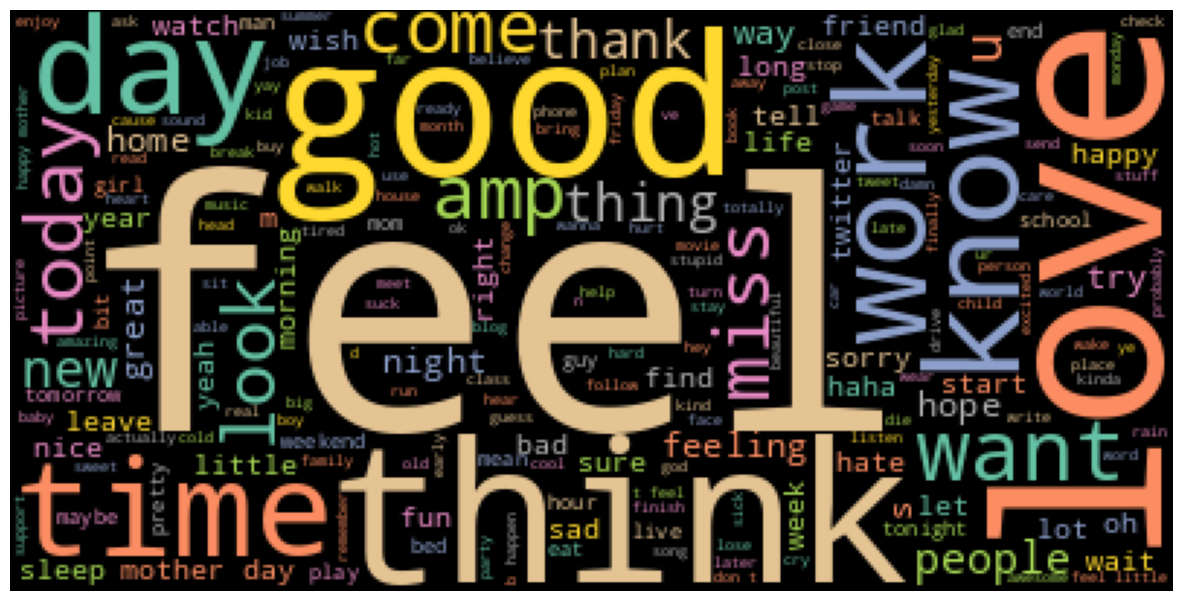

In [57]:
plt.figure(figsize = (15, 15), facecolor = None)
wc=WordCloud(colormap='Set2').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [59]:
# Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 5) #minimum word freq=5
dtm_v1 = pd.DataFrame(countvec1.fit_transform(emotion_data['Final_Cleaned_Text_tokens']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1


(56000, 6380)


,aa,aaaah,aaah,aah,aaron,ab,abandon,abby,abc,abide,...,zack,zealand,zero,zoe,zombie,zone,zoo,zoom,ztnewetnorb,ãââ½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Sentiment Analysis

In [60]:
emotion_data['Emotion'].value_counts()

,count
Emotion,
happiness,10571
sadness,9831
neutral,8638
worry,8459
love,5146
surprise,2759
anger,2269
fear,1937
fun,1776


In [63]:
dtm_v1['Emotion']=emotion_data['Emotion']

#remove neutrals
dtm_v1=dtm_v1[dtm_v1['Emotion'] != "neutral"]
print(dtm_v1['Emotion'].value_counts())

Emotion
happiness     10571
sadness        9831
worry          8459
love           5146
surprise       2759
anger          2269
fear           1937
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: count, dtype: int64


In [64]:
# train, test split


from sklearn.model_selection import train_test_split

X=dtm_v1.drop(['Emotion'], axis=1)
y=dtm_v1['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(37889, 6380)
(37889,)
(9473, 6380)
(9473,)


In [65]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB()
#Fitting model to our data
senti_model.fit(X_train, y_train)

MultinomialNB()

In [66]:
print("Train Accuracy", senti_model.score(X_train,y_train))
print("Test Accuracy", senti_model.score(X_test,y_test))

Train Accuracy 0.5980099765103328
Test Accuracy 0.4760899398289877


In [67]:
#Prediction
pred_sentiment=senti_model.predict(X_test)
print(pred_sentiment)

['love' 'happiness' 'happiness' ... 'worry' 'sadness' 'worry']
